NOMBRES: Diego Sebastián

APELLIDOS: Franco Arévalo

CARNE: 21484

FECHA: 28/07/2025

**Comentario**
En este laboratorio en partícular, para el último problema **es necesario presentar bibliografía si es necesario**.

## 1. Importe la información contenida en el siguiente enlace: "https://raw.githubusercontent.com/totalgood/nlpia/master/src/nlpia/data/hutto_ICWSM_2014/tweets_GroundTruth.csv" (5pts)

In [28]:
import pandas as pd
url = "https://raw.githubusercontent.com/totalgood/nlpia/master/src/nlpia/data/hutto_ICWSM_2014/tweets_GroundTruth.csv"
df = pd.read_csv(url)
print(df.head())

   id  sentiment                                               text
0   1   2.726316  Somehow I was blessed with some really amazing...
1   2   1.443299                 Yay. Another good phone interview.
2   3   2.873684  We were 17 deep last night &amp; the love was ...
3   4   2.857143                                     LMAO, AMAZING!
4   5  -2.154639  Two words that should die this year: Sexting a...


## 2. Prepare los datos para ser tokenizada y posteriormente entrenada y evaluada. (15pts)

In [29]:
import pandas as pd
import re
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
df_clean = df.copy()

# Función de limpieza del texto
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'\s+', ' ', text) 
    text = re.sub(r'https?:\/\/\S+', '', text)  
    text = re.sub(r'@\w+', '', text) 
    text = re.sub(r'#\w+', '', text)  
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text.strip()  

df_clean['clean_text'] = df_clean['text'].astype(str).apply(clean_text)

df_clean.head()

,id,sentiment,text,clean_text
0,1,2.726316,Somehow I was blessed with some really amazing...,somehow i was blessed with some really amazing...
1,2,1.443299,Yay. Another good phone interview.,yay another good phone interview
2,3,2.873684,We were 17 deep last night &amp; the love was ...,we were 17 deep last night amp the love was so...
3,4,2.857143,"LMAO, AMAZING!",lmao amazing
4,5,-2.154639,Two words that should die this year: Sexting a...,two words that should die this year sexting an...


## 3. Investigue sobre los tipos de tokenizadores que tiene la librería nltk. En un comentario explique brevemente en que se basó para escoger el que consideró correcto. (5pts)

Los tokenizadores en si ayudan a dividir los textos en segmentos más pequeños. Esta division se puede realizar de distintas maneras: por palabras, letras, palabras con simbolos, oraciones, etc. La libreria nltk, tiene varios tokenizadores. Algunos son los que se mencionaron anteriormente, pero algunos que me parecieron interesantes fueron "Regexp Tokenizer" que permite tokenizar con expresiones regulares, y "Tweet tokenizer", que permite tokenizar textos de redes sociales, los cuales incluyen símbolos arrobas, hashtags, abreviaciones, emojis, etc. En este trabajo se utilizaran los tokenizadores de Tweet, debido a que la naturaleza de los textos parecen ser de opiniones de redes sociales.


## 4. Cree un modelo para determinar los sentimientos de cada uno de los textos en la base de datos, partiendo de lo obtenido a través de la tokenización. Responda: (15pts)


In [32]:

# Función de limpieza del texto
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text.strip()


df_clean['clean_text'] = df_clean['text'].astype(str).apply(clean_text)
def clasificar_binario(score):
    if score > 0.5:
        return 1  # positivo
    elif score < -0.5:
        return 0  # negativo
    else:
        return None  # neutral (será eliminado)

df_clean['sentiment_binary'] = df_clean['sentiment'].apply(clasificar_binario)
df_clean = df_clean.dropna(subset=['sentiment_binary'])

# Tokenización con TweetTokenizer
tokenizer = TweetTokenizer()
df_clean['tokens'] = df_clean['clean_text'].apply(tokenizer.tokenize)
df_clean['text_for_model'] = df_clean['tokens'].apply(lambda tokens: ' '.join(tokens))

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df_clean['text_for_model'], df_clean['sentiment_binary'], test_size=0.2, random_state=42
)

# Vectorización 
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Modelo (RL)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_vec, y_train)
y_pred = log_model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)




accuracy: 0.8172362555720654


## 5. ¿Qué tipo de problema de Machine Learning es?

Regresión logística, un modelo de clasificacion supervisada que predice si el tweet tiene sentimiento positivo o negativo. 

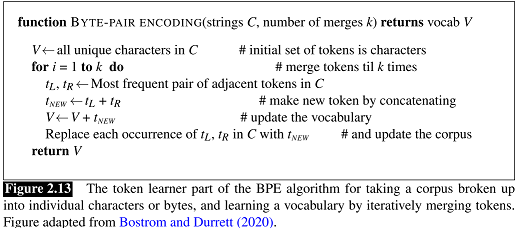

# 6. 

En La imagen anterior se muestra el algoritmo BPE visto en clase en seudo-código. El objetivo de este ejercicio es programarlo, desde 0, en Python. En este caso la calidad y limpieza del código si será tomada en cuenta.(60pts)

 Un detalle que no se menciono en clase es que los pares obtenidos pueden ser de la siguiente forma:
"bd" esta en el vocabulario. A través del proceso iterativo se ve que un el par más repetido es "bd" + "c", por lo tanto "bdc" entra al vocabulario. El pareo en BTE es por elementos del vocabulario, no por caracteres.

Este problema se encuentra fácilmente en internet. Pero los insto a retarse un poco a la hora de intentar resolverlo. Se presentarán situaciones donde la biblografía puede ser escasa, así que poder leer un algoritmo y programarlo es una habilidad importante.

In [35]:
#Texto que se debe tokenizar a través de BPE
text = "Imagina que intentas enseñar a leer a un niño. En lugar de introducirles directamente en párrafos complejos, empezaría introduciéndoles letras sueltas, luego sílabas y, por último, palabras enteras. De forma similar, la tokenización descompone grandes extensiones de texto en unidades más digeribles y comprensibles para las máquinas. El objetivo principal de la tokenización es representar el texto de forma que tenga sentido para las máquinas sin perder su contexto. Al convertir el texto en tokens, los algoritmos pueden identificar patrones más fácilmente. Este reconocimiento de patrones es crucial porque hace posible que las máquinas entiendan y respondan a la información humana. Por ejemplo, cuando una máquina encuentra la palabra correr, no la ve como una entidad singular, sino como una combinación de tokens que puede analizar y de la que puede extraer un significado."
corpus = text.split(".")

In [ ]:
corpus

['Imagina que intentas enseñar a leer a un niño',
 ' En lugar de introducirles directamente en párrafos complejos, empezaría introduciéndoles letras sueltas, luego sílabas y, por último, palabras enteras',
 ' De forma similar, la tokenización descompone grandes extensiones de texto en unidades más digeribles y comprensibles para las máquinas',
 ' El objetivo principal de la tokenización es representar el texto de forma que tenga sentido para las máquinas sin perder su contexto',
 ' Al convertir el texto en tokens, los algoritmos pueden identificar patrones más fácilmente',
 ' Este reconocimiento de patrones es crucial porque hace posible que las máquinas entiendan y respondan a la información humana',
 ' Por ejemplo, cuando una máquina encuentra la palabra correr, no la ve como una entidad singular, sino como una combinación de tokens que puede analizar y de la que puede extraer un significado',
 '']

### Resultado

In [52]:
# Librerias
import re
from collections import defaultdict, Counter


def get_vocab(text_lines):
    vocab = defaultdict(int)
    for line in text_lines:
        for word in line.strip().split():
            tokens = list(word) + ['</w>']
            vocab[tuple(tokens)] += 1
    return vocab

# Obtener parejas
def get_pair_freqs(vocab):
    freqs = Counter()
    for tokens, freq in vocab.items():
        for a, b in zip(tokens, tokens[1:]):
            freqs[(a, b)] += freq
    return freqs

# Merge de parejas
def merge_pair(pair, vocab):
    new_vocab = {}
    a, b = pair
    merged = a + b
    for tokens, freq in vocab.items():
        new_tokens = []
        i = 0
        while i < len(tokens):
            if i < len(tokens) - 1 and tokens[i] == a and tokens[i + 1] == b:
                new_tokens.append(merged)
                i += 2
            else:
                new_tokens.append(tokens[i])
                i += 1
        new_vocab[tuple(new_tokens)] = freq
    return new_vocab

#  BPE
def bpe(corpus, num_merges):
    vocab = get_vocab(corpus)
    merges = []
    for i in range(num_merges):
        pairs = get_pair_freqs(vocab)
        if not pairs:
            break
        best_pair = max(pairs, key=pairs.get)
        merges.append(best_pair)
        vocab = merge_pair(best_pair, vocab)
    return merges

# Aplicar BPE
def apply_bpe_to_sentence(sentence, merges):
    words = sentence.strip().split()
    tokenized = []
    for word in words:
        tokens = list(word) + ['</w>']
        for a, b in merges:
            i = 0
            while i < len(tokens) - 1:
                if tokens[i] == a and tokens[i + 1] == b:
                    tokens = tokens[:i] + [a + b] + tokens[i + 2:]
                    i = max(i - 1, 0)
                else:
                    i += 1
        tokenized.extend(tokens)
    return tokenized


# Texto y Corpus para BPE
text = """Imagina que intentas enseñar a leer a un niño. En lugar de introducirles directamente en párrafos complejos, empezaría introduciéndoles letras sueltas, luego sílabas y, por último, palabras enteras. De forma similar, la tokenización descompone grandes extensiones de texto en unidades más digeribles y comprensibles para las máquinas. El objetivo principal de la tokenización es representar el texto de forma que tenga sentido para las máquinas sin perder su contexto. Al convertir el texto en tokens, los algoritmos pueden identificar patrones más fácilmente. Este reconocimiento de patrones es crucial porque hace posible que las máquinas entiendan y respondan a la información humana. Por ejemplo, cuando una máquina encuentra la palabra correr, no la ve como una entidad singular, sino como una combinación de tokens que puede analizar y de la que puede extraer un significado."""
corpus = text.split(".")

# Merges
k = 20
merges = bpe(corpus, num_merges=k)

#Pseudocodigo
for i, sentence in enumerate(corpus):
    if sentence.strip():
        tokens = apply_bpe_to_sentence(sentence, merges)
        print(f"\n Oración {i+1}: {sentence.strip()}")
        print(f"BPE Tokens: {tokens}")
 


 Oración 1: Imagina que intentas enseñar a leer a un niño
BPE Tokens: ['I', 'm', 'a', 'g', 'in', 'a</w>', 'que</w>', 'in', 't', 'ent', 'as</w>', 'en', 's', 'e', 'ñ', 'a', 'r</w>', 'a</w>', 'l', 'e', 'e', 'r</w>', 'a</w>', 'u', 'n</w>', 'n', 'i', 'ñ', 'o</w>']

 Oración 2: En lugar de introducirles directamente en párrafos complejos, empezaría introduciéndoles letras sueltas, luego sílabas y, por último, palabras enteras
BPE Tokens: ['E', 'n</w>', 'l', 'u', 'g', 'a', 'r</w>', 'de</w>', 'in', 'tr', 'o', 'd', 'u', 'ci', 'r', 'l', 'es</w>', 'd', 'i', 're', 'c', 't', 'a', 'm', 'ent', 'e</w>', 'en', '</w>', 'p', 'á', 'r', 'r', 'a', 'f', 'o', 's</w>', 'co', 'm', 'p', 'l', 'e', 'j', 'o', 's', ',</w>', 'e', 'm', 'p', 'e', 'z', 'a', 'r', 'í', 'a</w>', 'in', 'tr', 'o', 'd', 'u', 'ci', 'é', 'n', 'd', 'o', 'l', 'es</w>', 'l', 'e', 'tr', 'as</w>', 's', 'u', 'e', 'l', 't', 'a', 's', ',</w>', 'l', 'u', 'e', 'g', 'o</w>', 's', 'í', 'l', 'a', 'b', 'as</w>', 'y', ',</w>', 'p', 'o', 'r</w>', 'ú', 'l', 't

# Bibliografia



Hugging Face. (s.f.). Tokenización basada en pares de bytes (BPE). Hugging Face LLM Course. Recuperado de: https://huggingface.co/learn/llm-course/es/chapter6/5

Pulapakura, R. (2024). [YouTube] Byte Pair Encoding - How does the BPE algorithm work? - Step by Step Guide. Recuperado de: https://www.youtube.com/watch?v=BcxJk4WQVIw

Khana, C. (2021) Word, Subword, and Character-Based Tokenization: Know the Difference. Towards Data Science. Recuperado de: https://towardsdatascience.com/word-subword-and-character-based-tokenization-know-the-difference-ea0976b64e17/